## Test

In [25]:
from dcapy.schedule import Well, WellsGroup, Period, Scenario
from dcapy import dca
from dcapy.wiener import MeanReversion
from dcapy.cashflow import CashFlowParams
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
oil_mr = MeanReversion(
    initial_condition = 66,
    ti = 0,
    generator = {'dist':'norm','kw':{'loc':0,'scale':3}},
    m=50,
    steps=36,
    eta=0.112652,
    freq_input = 'M'
)

In [27]:
cp = CashFlowParams(**{
          'name':'Income',
          'value':oil_mr,
          'multiply': 'oil_volume',
          'target':'income',
          'wi':0.92
      })
cp.get_value(5,freq_output='M',seed=21)

ChgPts(date=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], value=[66.0, 61.585436823202365, 60.4633584951777, 63.750986991922915, 57.19265283282642, 55.68929168250496, 57.96791815599725, 57.910273507083396, 55.272996814725396, 54.80813288112954, 55.52262054837376, 57.98235645318568, 52.33699847721425, 49.503699281958895, 50.38557704554511, 51.644594584329404, 52.201307145951944, 53.200978189661036, 55.508281714043584, 56.298703863761425, 63.33695070719947, 59.89368156189531, 57.767907247089134, 52.58512541146454, 54.09716346271902, 54.38200190632263, 53.443722979009124, 49.63769597851781, 55.56906134829208, 56.23182408515267, 58.04655343177194, 53.154857735661075, 53.8216384612898, 54.916900469507624, 59.56809825744968, 60.31435837356523])

In [28]:
p = Period(
    name='base',
    dca = dca.Arps(
      qi = dca.ProbVar(dist='triang',kw={'c':0.2,'loc':20,'scale':30}),
      di = 0.005102753514909305,
      freq_di='D',
      ti = 0,
      b=1,
    ),
    start = 0,
    end=36,
    freq_output='M',
    freq_input='M',
    cashflow_params = [
      {
          'name':'wo',
          'value':-212000,
          'periods':1,
          'target':'capex'
      },
      {
          'name':'Opex',
          'value':-14,
          'multiply': 'oil_volume',
          'target':'opex'
      },
      {
          'name':'Income',
          'value':oil_mr,
          'multiply': 'oil_volume',
          'target':'income',
          'wi':0.92
      },
      {
          'name':'abandon',
          'value':-200000,
          'periods':-1,
          'target':'capex'
      },

    ]
)
s = Scenario(name='sc', periods = [p])
w = Well(
      name = f'well_Socha',
      scenarios = [
        s
      ]
)

gw = WellsGroup(name='wells',wells=[w], seed=21)
gw.tree()

🏭wells                                                                                      
┗━━ 🗼well_Socha                                                                             
    ┗━━ 🔀sc                                                                                 
        ┗━━ 📉base                                                                           

In [29]:
f = gw.generate_forecast(freq_output='M', iter=100)
f.head()

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:84: RuntimeWarning: divide by zero encountered in true_divide
  f = qi/(di*(b-1))
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:87: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


,oil_rate,oil_cum,iteration,oil_volume,period,scenario,well
date,,,,,,,
0,22.961499,0.000000,0,640.950088,base,sc,well_Socha
1,19.913143,640.950088,0,600.941599,base,sc,well_Socha
2,17.579322,1201.883198,0,529.814439,base,sc,well_Socha
3,15.735161,1700.578967,0,473.798024,base,sc,well_Socha
4,14.241187,2149.479247,0,428.526382,base,sc,well_Socha


In [23]:
c = gw.generate_cashflow(freq_output='M')

print(len(c))

100


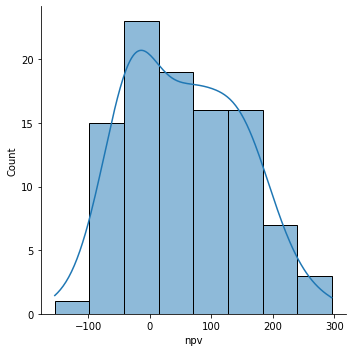

In [24]:
npv_df = gw.npv(0,freq_cashflow='M')/1000

sns.displot(npv_df['npv'], kde=True)